In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('amazon_order_history.csv')

In [3]:
orders.shape

(54, 12)

In [4]:
orders.columns

Index(['order id', 'items', 'to', 'date', 'total', 'postage', 'gift', 'VAT',
       'GST', 'PST', 'refund', 'payments'],
      dtype='object')

In [5]:
orders = orders[orders.total != '1 Audible Credit']
orders.head()

,order id,items,to,date,total,postage,gift,VAT,GST,PST,refund,payments
0,702-5914879-3089859,Pre-Seasoned Cast Iron 2-In-1 Multi Cooker - 3...,Anissah Abbas,2020-01-21,CDN$ 42.99,CDN$ 0.00,0,CDN$ 42.99,0,CDN$ 0.00,0,"Visa ending in 2545: January 22, 2020: CDN$ 42..."
1,D01-9496487-7878646,1 Book Monthly Membership;,0,2020-01-17,CDN$ 14.95,0,0,0,0,Item(s) Subtotal: CDN$ 14.95 ---- ...,0,2020-01-17: CDN$ 14.95;
3,702-4586176-1878651,Whiskey Words & a Shovel I; Adrien Gagnon - Re...,Anissah Abbas,2020-03-23,CDN$ 32.08,CDN$ 6.99,0,CDN$ 29.37,0,CDN$ 1.25,0,"Visa ending in 1837: March 23, 2020: CDN$ 32.08;"
4,702-3780319-3824235,DTECH USB Printer Cable 6 Feet Type A to B Mal...,Anissah Abbas,2020-03-20,CDN$ 10.99,CDN$ 0.00,0,CDN$ 10.99,0,CDN$ 0.00,0,"Visa ending in 1837: March 20, 2020: CDN$ 10.99;"
5,D01-5421149-3328268,1 Book Monthly Membership;,0,2020-03-17,CDN$ 16.44,0,0,0,0,Item(s) Subtotal: CDN$ 14.95 ---- ...,0,2020-03-17: CDN$ 16.44;


In [6]:
orders['total'] = orders['total'].replace('[CDN$, .]', '', regex=True)

In [7]:
orders['total']

0                     4299
1                     1495
3                     3208
4                     1099
5                     1644
6                     3499
7                     1644
8                     1034
9                     2797
11                    3499
12                    4444
13                    1644
14                    3499
15                   16095
16                    3897
17                    1644
18                    2999
19                    1644
20                    1644
21                    1294
23                    1999
24                    3218
25                    6566
26                    1644
27                     998
28                    1699
29                    2299
30                     979
32                    1609
33                    1299
34                    2951
35                    3499
36                    1644
41                    4742
42                    3537
44                     866
45                    1899
4

In [8]:
orders.drop([53], axis=0, inplace=True)
orders['total'].tail()
#orders['total'] = orders['total'].astype(float)

48     4095
49     1967
50    19427
51     7258
52     3599
Name: total, dtype: object

In [9]:
orders['total'] = orders['total'].astype(float)

In [10]:
orders['total'] = orders['total'] / 100

In [11]:
orders['total'].sum()

1479.78

In [12]:
orders['total'].mean()

33.63136363636364

In [13]:
orders['total'].median()

21.49

In [14]:
orders['total'].max()

194.27

In [15]:
orders['total'].min()

8.66

In [16]:
orders.head()

,order id,items,to,date,total,postage,gift,VAT,GST,PST,refund,payments
0,702-5914879-3089859,Pre-Seasoned Cast Iron 2-In-1 Multi Cooker - 3...,Anissah Abbas,2020-01-21,42.99,CDN$ 0.00,0,CDN$ 42.99,0,CDN$ 0.00,0,"Visa ending in 2545: January 22, 2020: CDN$ 42..."
1,D01-9496487-7878646,1 Book Monthly Membership;,0,2020-01-17,14.95,0,0,0,0,Item(s) Subtotal: CDN$ 14.95 ---- ...,0,2020-01-17: CDN$ 14.95;
3,702-4586176-1878651,Whiskey Words & a Shovel I; Adrien Gagnon - Re...,Anissah Abbas,2020-03-23,32.08,CDN$ 6.99,0,CDN$ 29.37,0,CDN$ 1.25,0,"Visa ending in 1837: March 23, 2020: CDN$ 32.08;"
4,702-3780319-3824235,DTECH USB Printer Cable 6 Feet Type A to B Mal...,Anissah Abbas,2020-03-20,10.99,CDN$ 0.00,0,CDN$ 10.99,0,CDN$ 0.00,0,"Visa ending in 1837: March 20, 2020: CDN$ 10.99;"
5,D01-5421149-3328268,1 Book Monthly Membership;,0,2020-03-17,16.44,0,0,0,0,Item(s) Subtotal: CDN$ 14.95 ---- ...,0,2020-03-17: CDN$ 16.44;


In [17]:
orders.drop(['order id', 'to', 'gift', 'refund', 'VAT', 'payments'], axis=1, inplace=True)

In [18]:
orders['date'] = pd.to_datetime(orders['date'])

In [19]:
orders.head()

,items,date,total,postage,GST,PST
0,Pre-Seasoned Cast Iron 2-In-1 Multi Cooker - 3...,2020-01-21,42.99,CDN$ 0.00,0,CDN$ 0.00
1,1 Book Monthly Membership;,2020-01-17,14.95,0,0,Item(s) Subtotal: CDN$ 14.95 ---- ...
3,Whiskey Words & a Shovel I; Adrien Gagnon - Re...,2020-03-23,32.08,CDN$ 6.99,0,CDN$ 1.25
4,DTECH USB Printer Cable 6 Feet Type A to B Mal...,2020-03-20,10.99,CDN$ 0.00,0,CDN$ 0.00
5,1 Book Monthly Membership;,2020-03-17,16.44,0,0,Item(s) Subtotal: CDN$ 14.95 ---- ...


In [20]:
import matplotlib as plt
%matplotlib inline

<AxesSubplot:xlabel='date'>

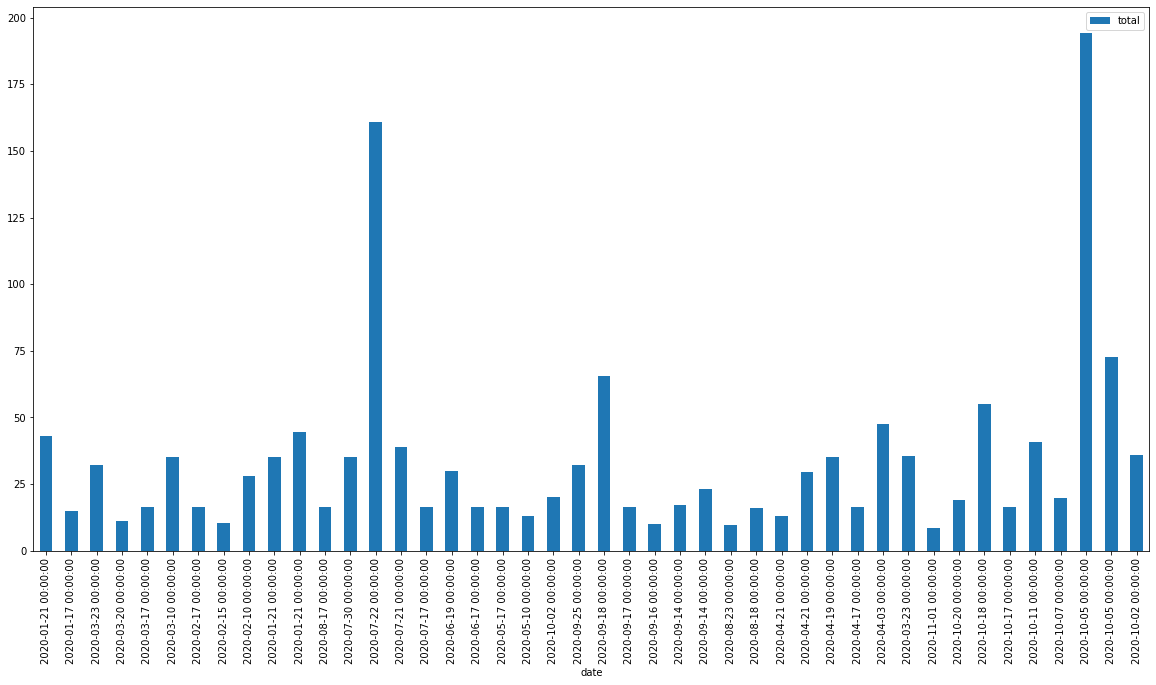

In [21]:
orders.plot.bar(x='date', y='total', figsize=(20,10))

In [22]:
daily_orders = orders.groupby('date').sum()['total']

date
2020-01-17     14.95
2020-01-21    122.42
2020-02-10     27.97
2020-02-15     10.34
2020-02-17     16.44
2020-03-10     34.99
2020-03-17     16.44
2020-03-20     10.99
2020-03-23     67.45
2020-04-03     47.42
2020-04-17     16.44
2020-04-19     34.99
2020-04-21     42.50
2020-05-10     12.94
2020-05-17     16.44
2020-06-17     16.44
2020-06-19     29.99
2020-07-17     16.44
2020-07-21     38.97
2020-07-22    160.95
2020-07-30     34.99
2020-08-17     16.44
2020-08-18     16.09
2020-08-23      9.79
2020-09-14     39.98
2020-09-16      9.98
2020-09-17     16.44
2020-09-18     65.66
2020-09-25     32.18
2020-10-02     55.98
2020-10-05    266.85
2020-10-07     19.67
2020-10-11     40.95
2020-10-17     16.44
2020-10-18     55.18
2020-10-20     18.99
2020-11-01      8.66
Name: total, dtype: float64

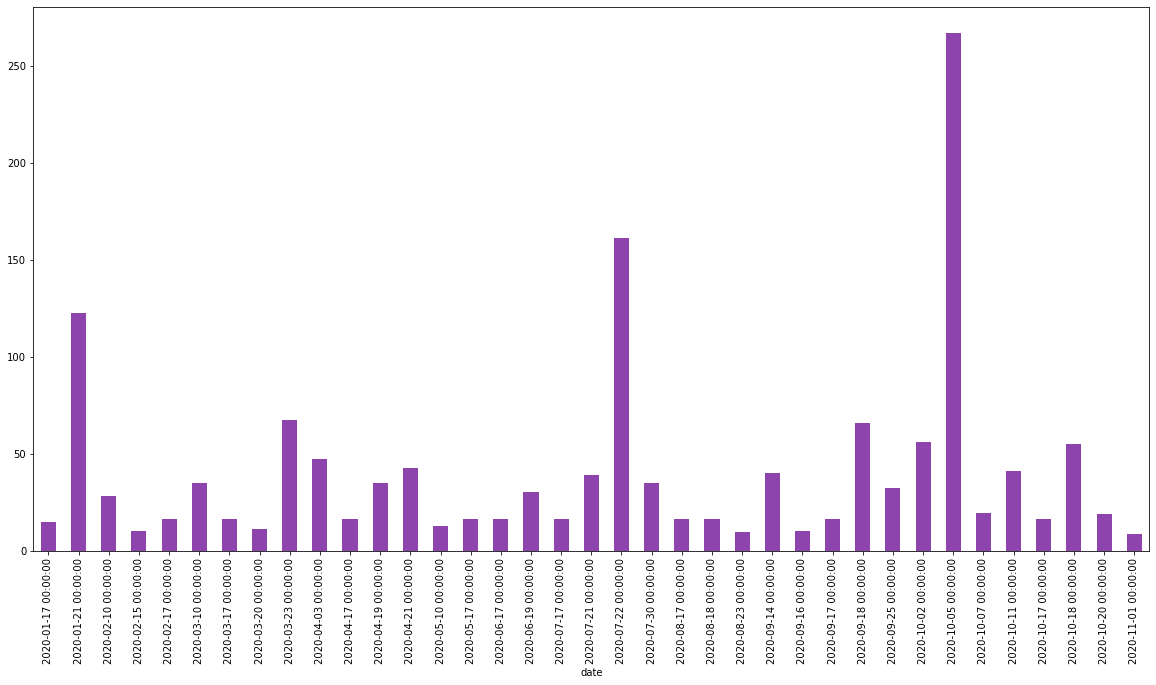

In [23]:
daily_orders.plot.bar(figsize=(20,10), color='#8E44AD')
daily_orders

In [24]:
orders['month'] = orders['date'].map(lambda x: x.month)
orders['month']

0      1
1      1
3      3
4      3
5      3
6      3
7      2
8      2
9      2
11     1
12     1
13     8
14     7
15     7
16     7
17     7
18     6
19     6
20     5
21     5
23    10
24     9
25     9
26     9
27     9
28     9
29     9
30     8
32     8
33     4
34     4
35     4
36     4
41     4
42     3
44    11
45    10
46    10
47    10
48    10
49    10
50    10
51    10
52    10
Name: month, dtype: int64

In [26]:
orders['check'] = pd.Series([1])
orders.fillna(1, inplace=True)

<AxesSubplot:title={'center':'Number of Purchases per Month'}, xlabel='month'>

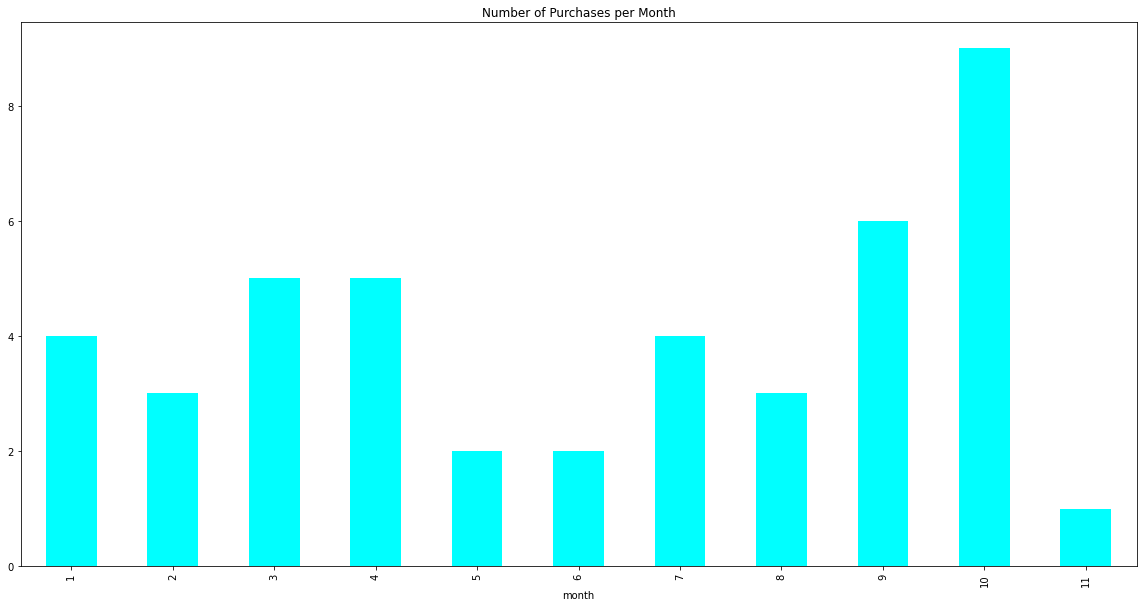

In [27]:
monthly_orders = orders.groupby('month').sum()['check']
monthly_orders.plot.bar(figsize=(20,10), color='#00FFFF', title='Number of Purchases per Month')

<AxesSubplot:title={'center':'Amount Spent per Month'}, xlabel='month'>

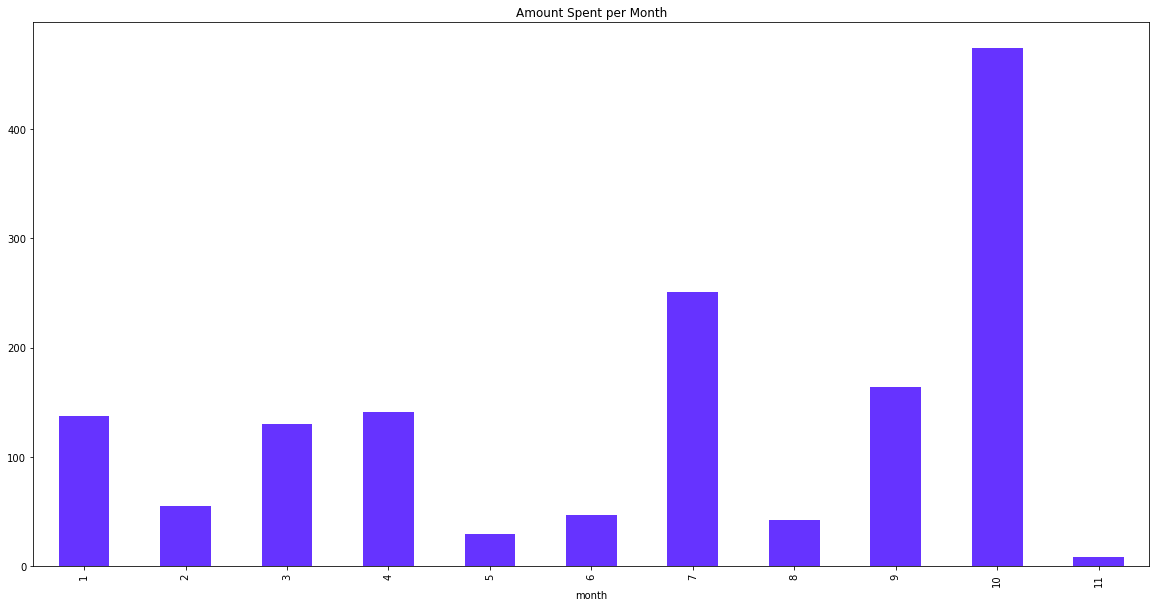

In [28]:
monthly_totals = orders.groupby('month').sum()['total']
monthly_totals.plot.bar(figsize=(20,10), color='#6633FF', title='Amount Spent per Month')

In [29]:
monthly_totals.mean()

134.52545454545455

In [30]:
monthly_orders.mean()

4.0